# <img style="float: left; padding-right: 20px; width: 68px" src="/home/thuy/Desktop/ML_project/data/img/logoiuh.jpg">DATA SCIENCE - MACHINE LEARNING
## Đồ án cuối kì 
**Đại học Công nghiệp TP HCM**<br>
**Giảng viên hướng dẫn:** Nguyễn Việt Linh, Trương Vĩnh Linh<br>
**Thành viên nhóm:** 
<ol start="1">
<li> Lê Duy Tâm  </li>
<li> Tấn Đạt</li>
<li> Hoàng Khang </li>
<li> Tài Đức Phú Đa </li>
<li> Xuân Thủy </li>
</ol> 

**Đề tài:** Xây dựng mô hình ML/máy học dự đoán giá cầu thủ bóng đá kv Châu Âu


------

# 1. Import library

In [1]:
PATH_TO_PROJECT = '/home/thuy/Desktop/ML_project'
import sys
sys.path.append(PATH_TO_PROJECT)

from library import craw 
from library import preprocessing as pre
from library.automate_load_data import refresh_data

from datetime import date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import statsmodels.api as sm
from statsmodels.api import OLS

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score



# 2. Data load

In [2]:
refresh_data()

>>LATE UPDATED DATA ON 2021-12-12
:~$you want to continued?
>>Cancelled


In [3]:
def load_data(file):
    df = pd.read_csv(PATH_TO_PROJECT+'/data/raw_data/{}.csv'.format(file),
    encoding='utf-8')
    print(f'{file} shape: {df.shape}')
    return df
df_gk = load_data('gk_data')
df_ct = load_data('ct_data')

gk_data shape: (308, 17)
ct_data shape: (2368, 17)


In [4]:
df_gk.head(2)

,name,league,age,height,position,erfolge,caps,goalsCap,follower,club,contractYear,country,appearances,nilnil_games,goals_conceded,minuted,price
0,Steve Mandanda,4,36,1.85,0,8,34,0,634401.0,1,2.539726,1,4.0,1.0,5.0,360.00,2.0
1,Unai Simón,1,24,1.90,0,3,20,0,3800.0,1,3.539726,1,14.0,6.0,10.0,1.26,20.0


In [5]:
df_ct.head(1)

,name,league,age,height,position,erfolge,caps,goalsCap,follower,club,contractYear,country,appearances,goals,assists,minuted,price
0,Habib Keïta,4,19,1.82,2,0,0,0,6063.0,1,3.539726,3,8.0,1.0,0.0,413.0,0.5


In [6]:
df_gk.dtypes

name               object
league              int64
age                 int64
height            float64
position            int64
erfolge             int64
caps                int64
goalsCap            int64
follower          float64
club                int64
contractYear      float64
country             int64
appearances       float64
nilnil_games      float64
goals_conceded    float64
minuted           float64
price             float64
dtype: object

In [7]:
df_ct.dtypes

name             object
league            int64
age               int64
height          float64
position          int64
erfolge           int64
caps              int64
goalsCap          int64
follower        float64
club              int64
contractYear    float64
country           int64
appearances     float64
goals           float64
assists         float64
minuted         float64
price           float64
dtype: object

In [8]:
df_gk.describe()

,league,age,height,position,erfolge,caps,goalsCap,follower,club,contractYear,country,appearances,nilnil_games,goals_conceded,minuted,price
count,308.000000,308.000000,308.000000,308.0,308.000000,308.000000,308.0,3.080000e+02,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,2.129870,27.665584,1.900974,0.0,2.068182,11.123377,0.0,4.543724e+05,0.840909,1.708424,1.097403,19.321429,5.704545,24.970779,162.128987,4.786640
std,1.460451,5.449369,0.042315,0.0,2.952153,23.630938,0.0,1.674074e+06,0.366356,1.191802,0.606904,63.537088,19.682340,80.193957,262.567700,9.636501
min,0.000000,18.000000,1.780000,0.0,0.000000,0.000000,0.0,4.000000e+00,0.000000,-0.463014,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,1.000000,23.000000,1.870000,0.0,0.000000,0.000000,0.0,1.436575e+04,1.000000,0.536986,1.000000,1.000000,0.000000,0.000000,1.153000,0.300000
50%,2.000000,28.000000,1.900000,0.0,1.000000,1.000000,0.0,3.716150e+04,1.000000,1.536986,1.000000,6.000000,1.000000,8.000000,1.800000,1.000000
75%,3.000000,32.000000,1.930000,0.0,3.000000,8.000000,0.0,1.392990e+05,1.000000,2.539726,1.000000,15.250000,4.000000,20.000000,270.000000,5.000000
max,5.000000,40.000000,2.040000,0.0,20.000000,139.000000,0.0,1.349487e+07,1.000000,5.539726,3.000000,514.000000,152.000000,677.000000,990.000000,70.000000


In [9]:
df_ct.describe()

,league,age,height,position,erfolge,caps,goalsCap,follower,club,contractYear,country,appearances,goals,assists,minuted,price
count,2368.000000,2368.000000,2368.000000,2368.000000,2368.000000,2368.000000,2368.000000,2.368000e+03,2368.000000,2368.000000,2368.000000,2368.000000,2368.000000,2368.000000,2368.000000,2368.000000
mean,2.046030,25.714105,1.819362,1.921030,2.273649,15.240709,2.326014,1.223010e+06,0.850929,2.000718,1.332348,18.868243,2.066301,1.476351,315.606806,10.679761
std,1.429661,4.385108,0.063074,0.819655,3.802734,23.799834,6.823823,1.098725e+07,0.356234,1.276470,0.815317,42.267315,6.800761,3.796618,328.761492,15.494484
min,0.000000,16.000000,1.630000,1.000000,0.000000,0.000000,0.000000,9.000000e+00,0.000000,0.126027,0.000000,0.000000,0.000000,0.000000,0.000000,0.075000
25%,1.000000,22.000000,1.780000,1.000000,0.000000,1.000000,0.000000,1.958100e+04,1.000000,0.536986,1.000000,8.000000,0.000000,0.000000,1.420750,1.800000
50%,2.000000,25.000000,1.820000,2.000000,1.000000,5.000000,0.000000,4.806150e+04,1.000000,1.536986,1.000000,13.000000,1.000000,1.000000,215.500000,5.000000
75%,3.000000,29.000000,1.860000,3.000000,3.000000,19.000000,2.000000,2.653692e+05,1.000000,2.539726,2.000000,16.000000,2.000000,2.000000,598.000000,13.000000
max,5.000000,40.000000,2.010000,3.000000,62.000000,184.000000,115.000000,3.742918e+08,1.000000,9.542466,3.000000,516.000000,144.000000,78.000000,999.000000,160.000000


In [10]:
def fig_na(df):
    plt.figure(figsize= (8, 4))
    plt.style.use('fivethirtyeight')
    sns.heatmap(df_ct.isna(),  yticklabels= False, cbar= False, cmap= 'viridis' )
    plt.show()

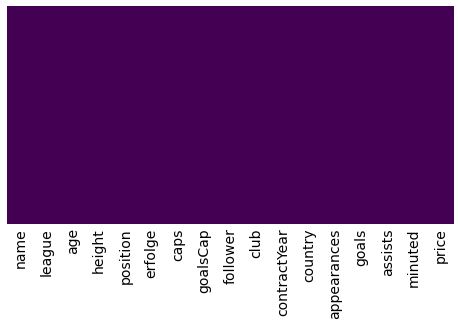

In [11]:
fig_na(df_gk)

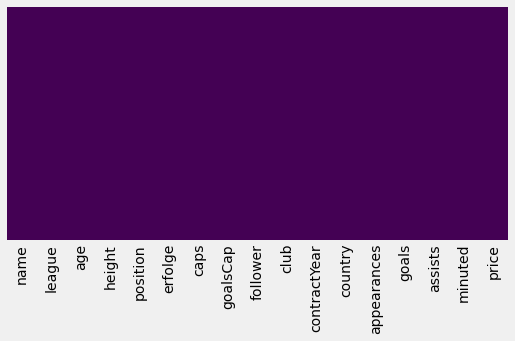

In [12]:
fig_na(df_ct)

#### Attribute info

`name`: Name of the player  
`league`: 0 for Premeir league, 1 for Laliga, 2 for Seria, 3 for Bundesliga, 4 for Ligue, 5 for rest  
`age` : Age of the player    
`height` : Height of the player  
`position` :  1 for attackers, 2 for midfielders, 3 for defenders, 4 for goalkeepers  
`erfolge` : Achieve something  
`caps` : Times to join the national team  
`goalsCap` : Goal for the national team  
`follower` : Follower on instagram  
`club` : 0 for big club , 1 for rest  
`contractYear` : rest time of contract  
`country` : 1 for England, 2 for EU, 3 for Americas, 4 for Rest of World  
`price` : As on <a href="https://www.transfermarkt.com/">transfermarkt.com</a>  
`appearances` : Appearances for the club  
`nilnil_games` : Only for GK, that mean nil nil games   
`goals_conceded` : Only for GK, that mean goals conceded    
`goals` : Goals for the club 
`assists` : Assists for club  
`minuted` : Minutes played for the club    

In [13]:
df_gk.columns.values

array(['name', 'league', 'age', 'height', 'position', 'erfolge', 'caps',
       'goalsCap', 'follower', 'club', 'contractYear', 'country',
       'appearances', 'nilnil_games', 'goals_conceded', 'minuted',
       'price'], dtype=object)

In [14]:
df_ct.columns.values

array(['name', 'league', 'age', 'height', 'position', 'erfolge', 'caps',
       'goalsCap', 'follower', 'club', 'contractYear', 'country',
       'appearances', 'goals', 'assists', 'minuted', 'price'],
      dtype=object)

In [15]:
#quati quali

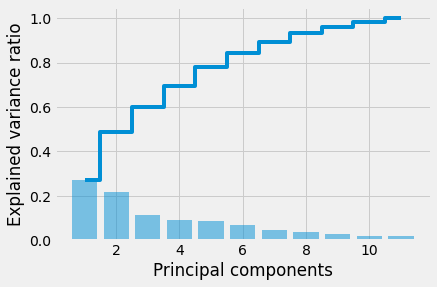

In [16]:
pca = PCA()
sc = StandardScaler()
X_tmp = df_ct[['age', 'height', 'erfolge', 'caps',
       'goalsCap', 'follower', 'contractYear', 'appearances',
        'goals', 'assists', 'minuted']].copy()
X_tmp_std = sc.fit_transform(X_tmp)
X_tmp_pca = pca.fit_transform(X_tmp_std)
plt.bar(range(1, 12), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 12), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

<img style="float: left; padding-right: 430px; width: 500px" src="/home/thuy/Desktop/ML_project/data/img/encod_.png">

In [17]:
#transform_atts(df_train, df_test, n_components)
#return X_train X_test

# 3. Training model

## A. Classification goalkeeps

In [18]:
df_gk = load_data('gk_data')

gk_data shape: (308, 17)


In [19]:
#label
## 0->2.5  : 0
## 2.5->10 : 1
## 10->40  : 2
## >40     : 3

In [20]:
df_gk = pre.label_price_gk(df_gk)

In [21]:
df_gk.label_price.unique()

array([0, 2, 1, 3])

In [22]:
df_gk.head(2)

,name,league,age,height,position,erfolge,caps,goalsCap,follower,club,contractYear,country,appearances,nilnil_games,goals_conceded,minuted,label_price
0,Steve Mandanda,4,36,1.85,0,8,34,0,634401.0,1,2.539726,1,4.0,1.0,5.0,360.00,0
1,Unai Simón,1,24,1.90,0,3,20,0,3800.0,1,3.539726,1,14.0,6.0,10.0,1.26,2


In [23]:
df_train, df_test = train_test_split(
    df_gk,
    test_size=0.2,
    random_state=40,
    stratify=df_gk[['league']]
)

In [24]:
print(f'df Train: {df_train.shape}')
print(f'df test: {df_test.shape}')

df Train: (246, 17)
df test: (62, 17)


In [25]:
print(f'position: {df_train.position.unique()}')
print(f'country: {df_train.country.unique()}')
print(f'league: {df_train.league.unique()}')
print(f'club: {df_train.club.unique()}')
print(f'label: {df_train.label_price.unique()}')


position: [0]
country: [1 0 2 3]
league: [1 2 0 4 3 5]
club: [0 1]
label: [1 2 0 3]


In [26]:
print(f'position: {df_test.position.unique()}')
print(f'country: {df_test.country.unique()}')
print(f'league: {df_test.league.unique()}')
print(f'club: {df_test.club.unique()}')
print(f'label: {df_test.label_price.unique()}')

position: [0]
country: [2 1 0 3]
league: [1 4 2 0 3 5]
club: [0 1]
label: [1 0 3 2]


In [27]:
df_train.groupby(['club']).agg({'follower':np.mean, 'height': np.mean, 'nilnil_games':np.mean})

,follower,height,nilnil_games
club,,,
0,2.179847e+06,1.910606,11.30303
1,1.345853e+05,1.900094,4.27230


In [28]:
#age square

In [29]:
df_ct.groupby('age').agg({'price':np.mean})

,price
age,
16,1.050000
17,5.368182
18,6.366837
19,6.388911
20,6.926667
21,11.408444
22,12.122059
23,11.082514
24,14.955973


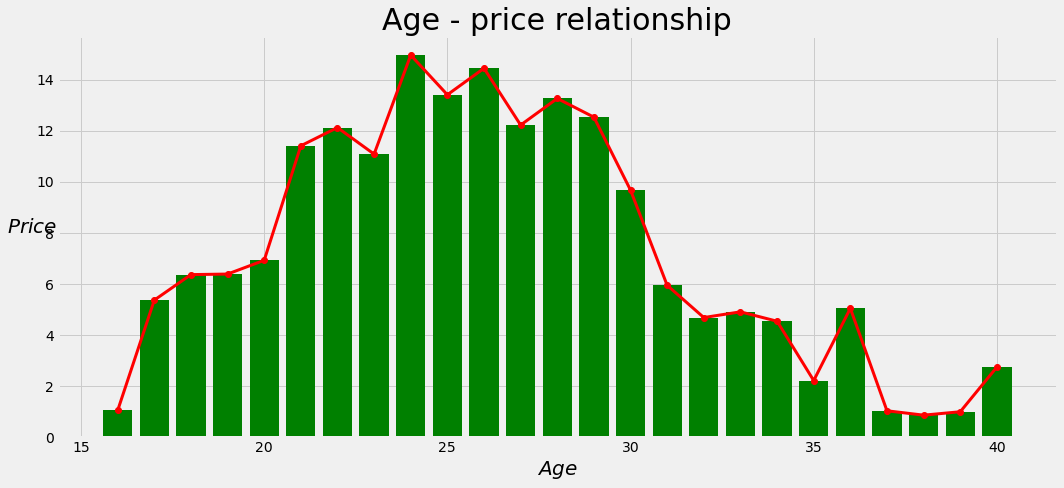

In [30]:
agePerPrice = df_ct.groupby('age').agg({'price' : np.mean}).reset_index()
plt.figure(figsize=(15, 7))
plt.bar(agePerPrice.age, agePerPrice.price, color = 'green')
plt.plot(agePerPrice.age, agePerPrice.price, '-r', linewidth = 3, marker='o')
plt.xlabel('$Age$', size=20)
plt.ylabel('$Price$',size=20, rotation=0)
plt.title('Age - price relationship', size=30)
plt.tight_layout()

In [31]:
#data transform

In [32]:
## add age square

In [33]:
trans = pre.process_transform()
df_train = trans.add_age_square(df_train)
df_test = trans.add_age_square(df_test)

In [34]:
df_train.head(1)

,name,league,age,height,position,erfolge,caps,goalsCap,follower,club,contractYear,country,appearances,nilnil_games,goals_conceded,minuted,label_price,age_square
190,Iñaki Peña,1,22,1.84,0,2,0,0,259839.0,0,1.536986,1,9.0,4.0,8.0,810.0,1,484


In [35]:
##transform data(log)

In [36]:
def _log(b, x):
    return np.log(x)/np.log(b)

/tmp/ipykernel_18236/3333428649.py:2: RuntimeWarning: divide by zero encountered in log
  return np.log(x)/np.log(b)
/tmp/ipykernel_18236/3333428649.py:2: RuntimeWarning: divide by zero encountered in log
  return np.log(x)/np.log(b)
/tmp/ipykernel_18236/3333428649.py:2: RuntimeWarning: divide by zero encountered in log
  return np.log(x)/np.log(b)


Text(0.5, 1.0, '$ln$')

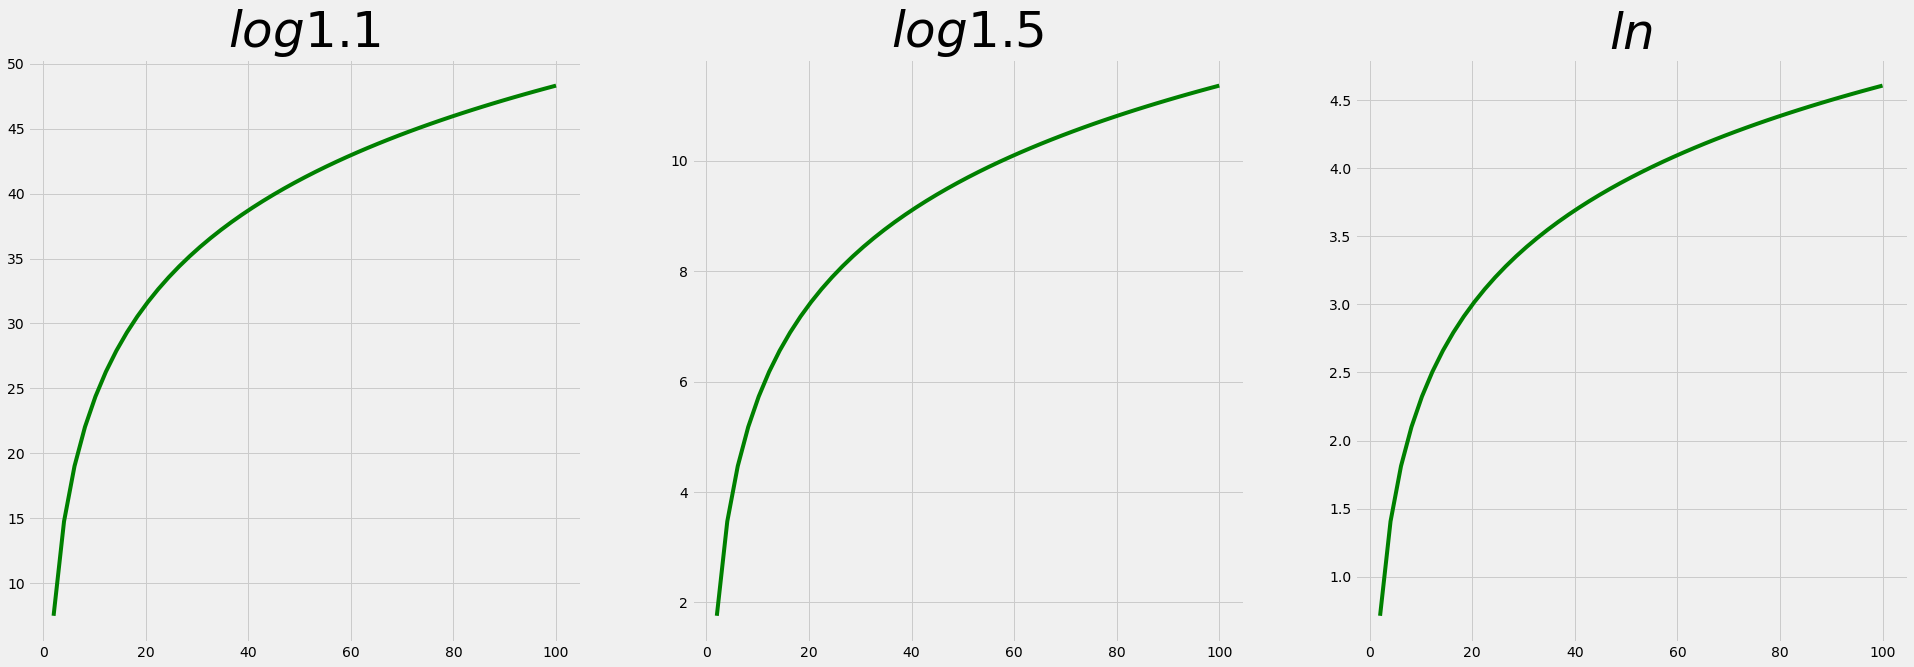

In [37]:
x_tmp = np.linspace(0, 100)
fig, ax= plt.subplots(1, 3, figsize=(30, 10))
ax[0].plot(x_tmp, _log(1.1, x_tmp), color='g')
ax[0].set_title('$log 1.1$', size=50)
ax[1].plot(x_tmp, _log(1.5, x_tmp), color='g')
ax[1].set_title('$log 1.5$', size=50)
ax[2].plot(x_tmp, _log(np.e, x_tmp), color='g')
ax[2].set_title('$ln$', size=50)

In [38]:
df_gk.columns

Index(['name', 'league', 'age', 'height', 'position', 'erfolge', 'caps',
       'goalsCap', 'follower', 'club', 'contractYear', 'country',
       'appearances', 'nilnil_games', 'goals_conceded', 'minuted',
       'label_price'],
      dtype='object')

In [39]:
trans = pre.process_transform()
#transform train
df_train = trans._log_with_b_(
    df_train,
    lst=['follower'],
    b=1.5
)
df_train = trans._log_with_b_(
    df_train,
    lst=['erfolge', 'caps', 'goalsCap', 'appearances', 'nilnil_games',
     'goals_conceded', 'minuted'],
    b=1.1
)
#transform test
df_test = trans._log_with_b_(
    df_test,
    lst=['follower'],
    b=1.5
)
df_test = trans._log_with_b_(
    df_test,
    lst=['erfolge', 'caps', 'goalsCap', 'appearances', 'nilnil_games',
     'goals_conceded', 'minuted'],
    b=1.1
)

In [40]:
df_train.head(2)

,name,league,age,height,position,erfolge,caps,goalsCap,follower,club,contractYear,country,appearances,nilnil_games,goals_conceded,minuted,label_price,age_square
190,Iñaki Peña,1,22,1.84,0,11.526705,0.000000,0.0,30.749431,0,1.536986,1,24.158858,16.886317,23.053409,70.278622,1,484
215,Alex Meret,2,24,1.90,0,14.545082,11.526705,0.0,31.468957,1,1.536986,1,21.817623,11.526705,21.817623,67.645511,2,576


In [41]:
df_test.head(2)

,name,league,age,height,position,erfolge,caps,goalsCap,follower,club,contractYear,country,appearances,nilnil_games,goals_conceded,minuted,label_price,age_square
133,Neto,1,32,1.90,0,21.817623,7.272541,0.0,34.502421,0,1.536986,2,11.526705,0.000000,14.545082,54.542936,1,1024
247,Claudio Bravo,1,38,1.84,0,23.053409,51.848002,0.0,39.243147,1,0.536986,2,25.158858,11.526705,29.090164,71.171046,0,1444


In [42]:
#pca(n = 6), encode

In [43]:
X_train, X_test = pre.transform_atts(df_train, df_test, n_components=6)
y_train = df_train[['label_price']]
y_test = df_test[['label_price']]

In [44]:
X_train.head(2)

,0,1,2,3,4,5,club,league_1,league_2,league_3,league_4,league_5,country_1,country_2,country_3
0,-0.064170,-1.475658,-0.153035,2.107657,-0.523718,-1.139563,0,1,0,0,0,0,1,0,0
1,0.298924,-0.664316,0.685544,1.502611,0.557014,-0.930772,1,0,1,0,0,0,1,0,0


In [45]:
X_test.head(2)

,0,1,2,3,4,5,club,league_1,league_2,league_3,league_4,league_5,country_1,country_2,country_3
0,0.601146,1.883584,0.568883,1.369152,0.491220,-0.878588,0,1,0,0,0,0,0,1,0
1,3.834627,2.629818,0.044226,2.946408,-0.001897,0.446867,1,1,0,0,0,0,0,1,0


In [46]:
y_train.head(2)

,label_price
190,1
215,2


In [47]:
y_test.head(2)

,label_price
133,1
247,0


In [50]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train.values, y_train.values)
y_pred = lr.predict(X_test.values)

/home/thuy/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.79      0.70        33
           1       0.31      0.25      0.28        16
           2       0.50      0.27      0.35        11
           3       0.50      0.50      0.50         2

    accuracy                           0.55        62
   macro avg       0.49      0.45      0.46        62
weighted avg       0.52      0.55      0.52        62



## B. Regression rest position

In [49]:
df_ct = load_data('ct_data')

ct_data shape: (2368, 17)


In [50]:
df_train_ct, df_test_ct = train_test_split(
    df_ct,
    test_size=0.3,
    random_state=40,
    stratify=df_ct[['league']]
)

In [51]:
print(f'df Train: {df_train_ct.shape}')
print(f'df test: {df_test_ct.shape}')

df Train: (1657, 17)
df test: (711, 17)


In [52]:
print(f'position: {df_train_ct.position.unique()}')
print(f'country: {df_train_ct.country.unique()}')
print(f'league: {df_train_ct.league.unique()}')
print(f'club: {df_train_ct.club.unique()}')

position: [2 1 3]
country: [1 2 3 0]
league: [2 1 3 0 4 5]
club: [1 0]


In [53]:
print(f'position: {df_test_ct.position.unique()}')
print(f'country: {df_test_ct.country.unique()}')
print(f'league: {df_test_ct.league.unique()}')
print(f'club: {df_test_ct.club.unique()}')

position: [3 1 2]
country: [1 0 2 3]
league: [3 4 0 5 2 1]
club: [1 0]


In [54]:
df_train_ct.groupby(['club', 'position']).agg({'follower':np.mean, 'height': np.mean, 'goals':np.mean})

follower    height     goals
club position                                  
0    1         2.832500e+06  1.838280  0.516129
     2         3.937769e+06  1.801609  1.689655
     3         1.951587e+07  1.803333  4.106667
1    1         1.631573e+05  1.838101  0.921788
     2         1.867054e+05  1.802960  1.380952
     3         2.594210e+05  1.810896  4.143868

In [55]:
#age square

In [56]:
df_ct.groupby('age').agg({'price':np.mean})

,price
age,
16,1.050000
17,5.368182
18,6.366837
19,6.388911
20,6.926667
21,11.408444
22,12.122059
23,11.082514
24,14.955973


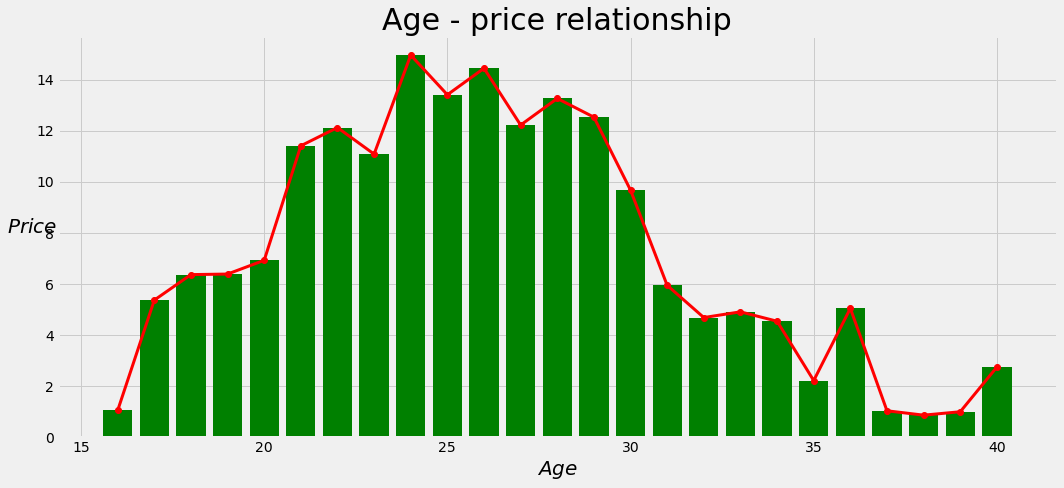

In [57]:
agePerPrice = df_ct.groupby('age').agg({'price' : np.mean}).reset_index()
plt.figure(figsize=(15, 7))
plt.bar(agePerPrice.age, agePerPrice.price, color = 'green')
plt.plot(agePerPrice.age, agePerPrice.price, '-r', linewidth = 3, marker='o')
plt.xlabel('$Age$', size=20)
plt.ylabel('$Price$',size=20, rotation=0)
plt.title('Age - price relationship', size=30)
plt.tight_layout()

In [58]:
#data transform

In [59]:
## add age square

In [60]:
trans = pre.process_transform()
df_train_ct = trans.add_age_square(df_train_ct)
df_test_ct = trans.add_age_square(df_test_ct)

In [61]:
df_train_ct.head(1)

,name,league,age,height,position,erfolge,caps,goalsCap,follower,club,contractYear,country,appearances,goals,assists,minuted,price,age_square
1860,Sergej Milinković-Savić,2,26,1.91,2,6,28,5,538477.0,1,2.539726,1,21.0,5.0,5.0,1.42,70.0,676


In [62]:
##transform data(log)

In [63]:
df_train_ct.columns

Index(['name', 'league', 'age', 'height', 'position', 'erfolge', 'caps',
       'goalsCap', 'follower', 'club', 'contractYear', 'country',
       'appearances', 'goals', 'assists', 'minuted', 'price', 'age_square'],
      dtype='object')

In [64]:
trans = pre.process_transform()
#transform train
df_train_ct = trans._log_with_b(
    df_train_ct,
    lst=['follower'],
    b=1.5
)
df_train_ct = trans._log_with_b(
    df_train_ct,
    lst=['erfolge', 'caps', 'goalsCap', 'appearances', 'goals',
     'assists', 'minuted'],
    b=1.1
)
#transform test_ctdf_test_ct
df_test_ct = trans._log_with_b(
    df_test_ct,
    lst=['follower'],
    b=1.5
)
df_test_ct = trans._log_with_b(
    df_test_ct,
    lst=['erfolge', 'caps', 'goalsCap', 'appearances', 'goals',
     'assists', 'minuted'],
    b=1.1
)

In [65]:
df_train_ct.head(2)

,name,league,age,height,position,erfolge,caps,goalsCap,follower,club,contractYear,country,appearances,goals,assists,minuted,price,age_square
1860,Sergej Milinković-Savić,2,26,1.91,2,20.416603,35.329865,5,538477.0,1,2.539726,1,44.575461,44.575461,44.575461,44.575461,70.0,676
276,Nahitan Nández,2,25,1.72,2,14.545082,41.045175,0,1094450.0,1,2.539726,2,31.431399,31.431399,31.431399,31.431399,20.0,625


In [66]:
df_test_ct.head(2)

,name,league,age,height,position,erfolge,caps,goalsCap,follower,club,contractYear,country,appearances,goals,assists,minuted,price,age_square
1427,Max Kruse,3,33,1.8,3,7.272541,14.545082,0,389175.0,1,0.536986,1,16.886317,16.886317,16.886317,16.886317,5.0,1089
1455,Gor Manvelyan,4,19,1.8,3,0.000000,0.000000,0,5790.0,1,2.539726,1,-9.613776,-9.613776,-9.613776,-9.613776,0.4,361


In [67]:
#pca, encode

In [107]:
X_train_ct, X_test_ct = pre.transform_atts(df_train_ct, df_test_ct, n_components=2)
y_train_ct = df_train_ct[['price']].reset_index().drop(columns=['index'])
y_test_ct = df_test_ct[['price']].reset_index().drop(columns=['index'])

In [108]:
X_train_ct.head(2)

,0,1,club,league_1,league_2,league_3,league_4,league_5,country_1,country_2,country_3,position_2,position_3
0,4.153588,-0.477733,1,0,1,0,0,0,1,0,0,1,0
1,2.431788,-0.588555,1,0,1,0,0,0,0,1,0,1,0


In [109]:
X_test_ct.head(1)

,0,1,club,league_1,league_2,league_3,league_4,league_5,country_1,country_2,country_3,position_2,position_3
0,-0.001152,1.927067,1,0,0,1,0,0,1,0,0,0,1


In [110]:
y_train_ct.head(2)

,price
0,70.0
1,20.0


In [111]:
y_test_ct.head(2)

,price
0,5.0
1,0.4


In [112]:
resu = OLS(y_train_ct.values, X_train_ct.values).fit()
resu.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.713
Model:                            OLS   Adj. R-squared (uncentered):              0.711
Method:                 Least Squares   F-statistic:                              314.7
Date:                Fri, 24 Dec 2021   Prob (F-statistic):                        0.00
Time:                        21:51:33   Log-Likelihood:                         -6221.9
No. Observations:                1657   AIC:                                  1.247e+04
Df Residuals:                    1644   BIC:                                  1.254e+04
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             5.5480      0.135     41.072      0.000       5.283       5.813
x2            -1.7048      0.158    -10.787      0.000      -2.015      -1.395
x3            -2.1450      0.700     -3.064      0.002      -3.518      -0.772
x4             0.4485      0.939      0.478      0.633      -1.394       2.291
x5             0.0030      0.913      0.003      0.997      -1.789       1.795
x6             0.8030      0.938      0.856      0.392      -1.036       2.642
x7             0.9019      0.944      0.955      0.340      -0.950       2.753
x8             7.0886      2.722      2.604      0.009       1.749      12.428
x9            10.3324      0.921     11.218      0.000       8.526      12.139
x10            9.3130      1.140      8.168      0.000       7.077      11.549
x11            8.0066      1.114      7.187      0.000       5.822      10.192
x12            3.6179      0.604      5.986      0.000       2.432       4.803
x13            3.4005      0.622      5.466      0.000       2.180       4.621
==============================================================================
Omnibus:                     1138.411   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25249.930
Skew:                           2.905   Prob(JB):                         0.00
Kurtosis:                      21.220   Cond. No.                         24.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
def k_fold(X_train, y_train, k_fold, lstAlpha=[0.001, 0.01, 0.05, 0.1, 0.25, 0.5, 0.6, 0.75, 0.9, 0.95, 1]):
    lst_alpha = []
    n = X_train.shape[0]
    shuffle_indices = np.random.permutation(n)
    X_shuffle = X_train.loc[shuffle_indices, :].copy().reset_index().drop(columns=['index'])
    y_shuffle = y_train.loc[shuffle_indices, :].copy().reset_index().drop(columns=['index'])
    m = n//k_fold
    for i in range(k_fold):
        if i == k_fold-1:
            index_test = np.arange(i*m, n, 1)
        else:
            index_test = np.arange(i*m, i*m+m, 1)
        index_train = np.setdiff1d(np.arange(0, n, 1), index_test)
        X_test_fold = X_shuffle.loc[index_test, :]
        y_test_fold = y_shuffle.loc[index_test, :]
        X_train_fold = X_shuffle.loc[index_train, :]
        y_train_fold = y_shuffle.loc[index_train, :]
        alpha4max = 0
        score_max = 0
        #grid search
        for i in lstAlpha:
            clf = Ridge(alpha=i)
            clf.fit(X_train_fold.values, y_train_fold)
            score_tmp = clf.score(X_test_fold.values, y_test_fold)
            if score_tmp > score_max:
                score_max = score_tmp
                alpha4max = i
        lst_alpha.append(alpha4max)
    return lst_alpha

In [114]:
#lst best alpha

In [115]:
best_alpha = k_fold(X_train_ct, y_train_ct, k_fold=10)

In [128]:
best_alpha

[0.75, 0.95, 0.6, 0.25, 0.6, 0.25, 0.6, 0.9, 0.25, 0.9]


In [116]:
np.mean(best_alpha)

0.6004

In [ ]:
#training model

In [117]:
alg = Ridge(alpha=np.mean(best_alpha))
alg.fit(X_train_ct.values, y_train_ct.values)

Ridge(alpha=0.6004)

In [ ]:
#test

In [130]:
r2_score(y_test_ct.values, alg.predict(X_test_ct.values))

0.6472515519702764

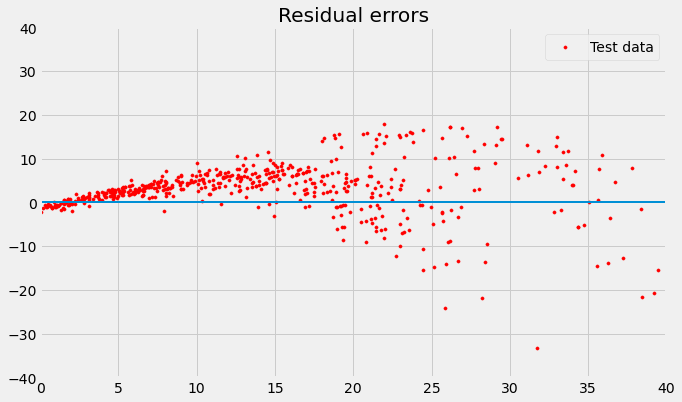

In [135]:
plt.figure(figsize= (10, 6))
# plt.xlim([0, 40])
# plt.ylim([-40, 40])
plt.style.use('fivethirtyeight')
plt.scatter(alg.predict(X_test_ct.values), alg.predict(X_test_ct.values) - y_test_ct, color = "red", s = 10, label = 'Test data')
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
plt.legend(loc = 'upper right') 
plt.title("Residual errors")
plt.show()

---